<a href="https://colab.research.google.com/github/isabelg-arcia/Data_Analysis_Exercises/blob/main/Regressao_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importando os pacotes que serão utilizados

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import statsmodels.api as sm
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.metrics import roc_curve, roc_auc_score


In [ ]:
# lendo a base de dados disponibilizada

df_dados = pd.read_csv("Heart_disease_statlog.csv")

In [ ]:
df_dados.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0
5,65,1,3,120,177,0,0,140,0,0.4,0,0,3,0
6,56,1,2,130,256,1,2,142,1,0.6,1,1,2,1
7,59,1,3,110,239,0,2,142,1,1.2,1,1,3,1
8,60,1,3,140,293,0,2,170,0,1.2,1,2,3,1
9,63,0,3,150,407,0,2,154,0,4.0,1,3,3,1


In [ ]:
# Transformação em dummys
dados_dummies = pd.get_dummies(df_dados, columns=['cp', 'ca', 'thal'], drop_first=True)
dados_dummies.head()
#dados = dados_dummies
dados = dados_dummies.drop(columns=['sex','chol','fbs','restecg','exang','slope'])
#dados = pd.concat([dados_dummies, df_dados[['target', 'age', 'trestbps', 'thalach', 'oldpeak']]])

In [ ]:
# separando em dados X (variáveis independentes) e y (target ou variável dependente)
y = dados['target']
x = dados.drop(columns = 'target')

In [ ]:
# printando os valores das variáveis independentes X (formato de matriz)
x

,age,trestbps,thalach,oldpeak,cp_1,cp_2,cp_3,ca_1,ca_2,ca_3,thal_2,thal_3
0,70,130,109,2.4,0,0,1,0,0,1,0,0
1,67,115,160,1.6,0,1,0,0,0,0,0,1
2,57,124,141,0.3,1,0,0,0,0,0,0,1
3,64,128,105,0.2,0,0,1,1,0,0,0,1
4,74,120,121,0.2,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,172,162,0.5,0,1,0,0,0,0,0,1
266,44,120,173,0.0,1,0,0,0,0,0,0,1
267,56,140,153,1.3,1,0,0,0,0,0,0,0
268,57,140,148,0.4,0,0,1,0,0,0,1,0


In [ ]:
# printando os valores da variável dependente y (formato de vetor)
y

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: target, Length: 270, dtype: int64

In [ ]:
# dividindo x e y em treino e teste
SEED = 77
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.30, random_state = SEED)

In [ ]:
# verificando o tamanho das bases de treino e de teste pelas linhas
base_treino = treino_x.shape[0]
base_teste = teste_x.shape[0]
print('A base de teste de treino tem %s elementos e a base de teste tem %s elementos.' %(base_treino, base_teste))

A base de teste de treino tem 189 elementos e a base de teste tem 81 elementos.


In [ ]:
# aplicando o algoritmo de regressão logística e calculando a acurácia de treino
modelo = LogisticRegression(max_iter=1000)
modelo.fit(treino_x, treino_y)
round(modelo.score(treino_x, treino_y), 3)*100

85.2

In [ ]:
# imprimindo a tabela resumo

reg_log = sm.Logit(treino_y, treino_x).fit()
print(reg_log.summary())

Optimization terminated successfully.
         Current function value: 0.328591
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  189
Model:                          Logit   Df Residuals:                      177
Method:                           MLE   Df Model:                           11
Date:                Mon, 15 May 2023   Pseudo R-squ.:                  0.5199
Time:                        12:48:23   Log-Likelihood:                -62.104
converged:                       True   LL-Null:                       -129.35
Covariance Type:            nonrobust   LLR p-value:                 2.148e-23
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0357      0.026     -1.384      0.166      -0.086       0.015
trestbps       0.0215      0.

variáveis relevantes: variáveis com p < 0.05 e maiores coeficientes ??

**Quanto ao tipo de dor torácia**:
- A chance de um paciente ter doença cardíaca é 18% maior se o paciente sente angina atípica, se todas as outras variáveis forem constantes, dada uma razão de probabilidade de exp(0,1674) = 1,18.
- A chance de um paciente ter doença cardíaca é 47% menor se o paciente sente dor não anginosa, se todas as outras variáveis forem constantes, dado um coeficiente de probabilidade de exp(-0,6357) = 0,53.
- A chance de um paciente ter doença cardíaca é 5,87 vezes maior se o paciente é assintomático, se todas as outras variáveis forem constantes, dada uma razão de chance de exp(0,1674) = 5,87.

**Quanto ao número de vasos principais**:
- A chance de um paciente ter doença cardíaca é 10 vezes maior se o paciente tem 1 vaso principal, se todas as outras variáveis forem constantes, dada uma razão de chance de exp(2,3107) = 10,08.
- A chance de um paciente ter doença cardíaca é 14 vezes maior se o paciente tem 2 vasos principais, se todas as outras variáveis forem constantes, dada uma razão de chance de exp(2,6552) = 14,23.
- A chance de um paciente ter doença cardíaca é 9 vezes maior se o paciente tem 3 vasos principais, se todas as outras variáveis forem constantes, dada uma razão de chance de exp(2,2390) = 9,38.

**Quanto ao distúrbio sanguíneo chamado talassemia**:
- A chance de um paciente ter doença cardíaca é 37% menor se o paciente tem defeito fixo (sem fluxo sanguíneo em alguma parte do coração), se todas as outras variáveis forem constantes, dado um coeficiente de probabilidade de exp(-0,4629) = 0,63.
- A chance de um paciente ter doença cardíaca é 4 vezes maior se o paciente tem defeito reversível (um fluxo sanguíneo é observado, mas não é normal (nominal), se todas as outras variáveis forem constantes, dada uma razão de chance de exp(1,4126) = 4,11.

In [ ]:
# aplicando o método predict na base de teste
previsoes = modelo.predict(teste_x)
previsoes

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [ ]:
#  calculando a acurácia de teste a partir das previsões
acuracia = accuracy_score(teste_y, previsoes)
acuracia = round(acuracia, 3)*100
acuracia

80.2

In [ ]:
# aplicando o método score (outra forma de calcular a acurácia)
round(modelo.score(teste_x, teste_y), 3)*100

80.2

Temos como resultado a probabilidade de acerto entre os valores previstos e os reais fornecidos

In [ ]:
# aplicando o método predict_proba
modelo.predict_proba(teste_x)

array([[0.05924414, 0.94075586],
       [0.96465904, 0.03534096],
       [0.02678004, 0.97321996],
       [0.93772816, 0.06227184],
       [0.97258481, 0.02741519],
       [0.98213973, 0.01786027],
       [0.96444974, 0.03555026],
       [0.71750035, 0.28249965],
       [0.02246246, 0.97753754],
       [0.69712327, 0.30287673],
       [0.57081322, 0.42918678],
       [0.01870948, 0.98129052],
       [0.05689623, 0.94310377],
       [0.41882437, 0.58117563],
       [0.84062659, 0.15937341],
       [0.06880335, 0.93119665],
       [0.73256648, 0.26743352],
       [0.11416227, 0.88583773],
       [0.95060208, 0.04939792],
       [0.94078682, 0.05921318],
       [0.79694471, 0.20305529],
       [0.79242443, 0.20757557],
       [0.97938459, 0.02061541],
       [0.93297668, 0.06702332],
       [0.47046984, 0.52953016],
       [0.38381413, 0.61618587],
       [0.52931357, 0.47068643],
       [0.98156241, 0.01843759],
       [0.16278906, 0.83721094],
       [0.02063764, 0.97936236],
       [0.

Esse método define a probabilidade do paciente sofrer uma doença cardíaca. Exemplo: Para a linha 1, tem as seguintes probabilidades de sofrer uma doença cardíaca:
- A probabilidade de pertencer a classe 0, que significa que o paciente é normal, é de 0.059;
- A probabilidade de pertencer a classe 1, que significa que o paciente sofre de doença cardíaca, é de 0.941.

In [ ]:
# plotando a matriz de confusão
matriz_confusao = confusion_matrix(teste_y, previsoes)
print(matriz_confusao)

[[40  3]
 [13 25]]


O resultado mostra que foram obtidas 65 (40+25) previsões corretas 16 (13+3) previsões incorretas.

A matriz obtida mostra o seguinte:

40 previsões negativas verdadeiras: As 40 primeiras observações são zeros previstos corretamente.

13 previsões falso-negativas: são aquelas previstas erroneamente como zeros.

3 previsões falso-positivas: são aquelas previstas erroneamente como um.

25 previsões positivas verdadeiras: são aquelas previstas corretamente como um.

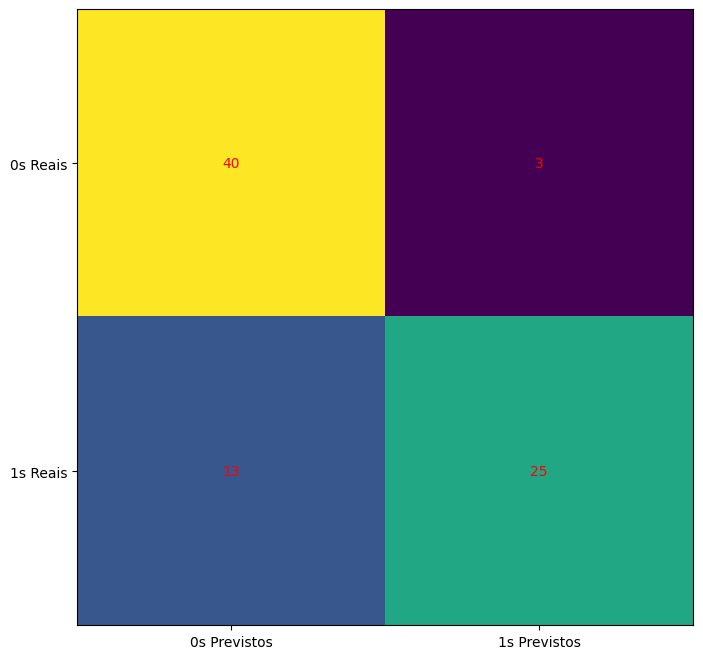

In [ ]:
# visualizando a matriz de confusão

cm = confusion_matrix(teste_y, previsoes)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('0s Previstos', '1s Previstos'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('0s Reais', '1s Reais'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
# organizando e compilando as funções derivadas da matriz de confusão
print(classification_report(teste_y, previsoes))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83        43
           1       0.89      0.66      0.76        38

    accuracy                           0.80        81
   macro avg       0.82      0.79      0.80        81
weighted avg       0.82      0.80      0.80        81



80% de acurácia: a cada 100 casos, o modelo acerta 80 casos.

Precisão: proporção de predições corretas de uma categoria em relação a todas as predições desta categoria.

Recall: Proporção de predições corretas de categoria alvo.

F1-Score: Média harmônica entre precisão e recall.

Support: a quantidade absoluta de casos encontrados em cada categoria.

roc_auc 0.8910648714810281


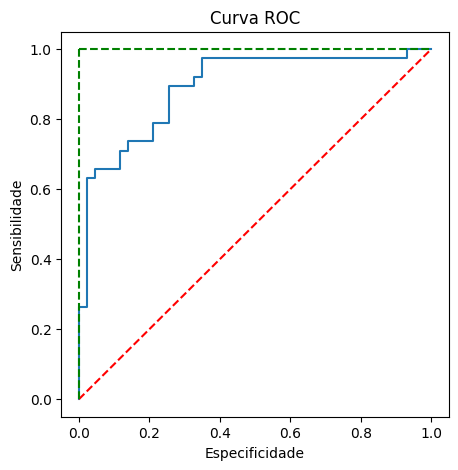

In [ ]:
# Gráfico de curva ROC
prob_previsao = modelo.predict_proba(teste_x)[:,1]

#tfp: taxa de falsos positivos
#tvp: taxa de verdadeiros positivos

tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
print('roc_auc', roc_auc_score(teste_y, prob_previsao))

plt.subplots(1, figsize = (5,5))
plt.title ('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.plot([0,1], ls="--", c= 'red')

plt.plot([0,0],[1,0], ls="--", c= 'green'), plt.plot([1,1], ls="--", c= 'green')

plt.show()

Linha vermelha: representa um modelo completamente aleatório, onde todas as previsões do modelo não seguem nenhuma tendência de dados / regra;

Linha verde: indica um modelo perfeito, onde todas as predições estão corretas;

AUC: área sob a curva ROC; quantifica a curva ROC, ou seja, através da área sob a curva, avalia o resultado do gráfico.

Convenção Estatística:

- área < 0,7: baixa discriminação;
- 0,7 ≤ área < 0,8: discriminação aceitável;
- 0,8 ≤ área < 0,9: discriminação excelente;
- área > 0,9: discriminação excepcional.

**AUC = 0,89 -> o modelo gerou uma discriminação excelente**